# Sesión 11: Análisis Exploratorio

# Análisis exploratorio de datos

In [ ]:
import pandas as pd

In [ ]:
df_sfy = pd.read_csv('data/data_spotify.csv')

In [ ]:
# Damos una vista previa a nuestros datos
df_sfy.head()


In [ ]:
# Reconocer qué tipo de datos tenemos
df_sfy.dtypes

In [ ]:
df_sfy.info()

In [ ]:
df_sfy.describe()

#### Detección de nulos

In [ ]:
df_sfy.isnull().any()

In [ ]:
df_sfy["genres"].isnull().sum()

In [ ]:
df_sfy["genres"].notnull().sum()

In [ ]:
df_sfy["genres"].isnull()

In [ ]:
df2 = df_sfy[df_sfy["genres"].notnull()]

In [ ]:
df2.info()

In [ ]:
df2.describe()

### 1.1. Si nuestra variable es numérica

In [ ]:
#!pip install seaborn

In [ ]:
import matplotlib.pyplot as plt

#### Histogramas

Un histograma es una representación gráfica de la distribución de datos numéricos. Toma como input una variable numérica. La variable se corta en varios bins, y el número de observación por bins está representado por la altura de la barra. Tenga en cuenta que la forma del histograma puede ser diferente dependiendo del número de bins que configure.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Make default histogram of sepal length
plt.hist(df_sfy["popularity"], bins = 40,edgecolor='black')
plt.show()

In [ ]:
# Make default histogram of sepal length
plt.hist(df_sfy["popularity"], bins=100,edgecolor='black')
plt.show()

In [ ]:
plt.hist(df_sfy["popularity"], bins=20, color='g', cumulative =True,edgecolor='black')
plt.show()

In [ ]:
plt.hist(df_sfy["popularity"], bins=100, color='g', cumulative =False,edgecolor='black')
plt.show()

In [ ]:
# Control del numero de bins
sns.distplot( df_sfy["popularity"], bins=10)

In [ ]:
# Control del numero de bins
sns.distplot( df_sfy["followers"], bins=100)

#### Diagrama de cajas

Boxplot es uno de los tipos de gráficos más comunes. Da un buen resumen de una o varias variables numéricas. La línea que divide la caja en 2 partes representa la mediana de los datos. El final del cuadro muestra los cuartiles superior e inferior. Las líneas extremas muestran los valores más altos y más bajos sin incluir *valores atípicos*. Tenga en cuenta que boxplot oculta el número de valores existiendo detrás de la variable. Por lo tanto, se recomienda imprimir el número de observación.

In [ ]:
df_box = df_sfy.loc[(df_sfy['genres'] == 'bolero') | (df_sfy['genres'] == 'spanish pop')]
df_box

In [ ]:
plt.boxplot(df_box['followers'])
plt.show()

In [ ]:
plt.boxplot(df_box['followers'], vert=False)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df_sfy['popularity'].plot(kind='box', color = 'blue')
plt.title('Diagrama de cajas')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
df_sfy['followers'].plot(kind='box', color = 'blue')
plt.title('Diagrama de cajas')
plt.show()

In [ ]:
plt.boxplot([df_box[df_box['genres']=='bolero']['followers'],
             df_box[df_box['genres']=='spanish pop']['followers']])
plt.show()

In [ ]:
sns.boxplot(x=df_box['genres'], y=df_box['followers'], palette="Reds")

In [ ]:
df_sfy[(df_sfy['genres']=='bolero') & (df_sfy['followers']>15000)]

In [ ]:
df_sfy[(df_sfy['genres']=='spanish pop') & (df_sfy['followers']>40000)]

In [ ]:
plt.boxplot([df_box[df_box['genres']=='bolero']['popularity'],
             df_box[df_box['genres']=='spanish pop']['popularity']])
plt.show()

In [ ]:
sns.boxplot( x=df_box['genres'], y=df_box['popularity'], palette="Blues")

In [ ]:
# Add jitter with the swarmplot function.
sns.boxplot( x=df_box['genres'], y=df_box['popularity'], palette="Blues")
sns.swarmplot(x=df_box['genres'], y=df_box['popularity'], data=df_box, color="grey")

#### Scaterplot


Un Scatterplot muestra el valor de 2 conjuntos de datos en 2 dimensiones. Cada punto representa una observación. La posición en los ejes X (horizontal) e Y (vertical) representa los valores de 2 variables. Es realmente útil estudiar la relación entre ambas variables.

In [ ]:
plt.scatter(df_sfy["followers"]/1000, y=df_sfy["popularity"])
plt.show()

In [ ]:
sns.regplot(x=df_sfy["followers"]/1000, y=df_sfy["popularity"], fit_reg=False)

In [ ]:
sns.regplot(x=df_sfy["followers"]/1000, y=df_sfy["popularity"], fit_reg=True)

In [ ]:
df_scp = df_sfy.loc[(df_sfy['genres'] == 'bolero') | (df_sfy['genres'] == 'spanish pop')]
df_scp.head()

In [ ]:
# Usemos el argumento 'hue' para definir una la variable factor 
sns.lmplot( x="followers", y="popularity", data=df_scp, fit_reg=False, hue='genres', legend=True)

### 1.2. Análisis de correlaciones

In [ ]:
#para variables numéricas
df_sfy.corr()

Lo que más nos importa es la relación entre la popularidad y los seguidores en la data de spotify.
El coeficiente de correlación de Pearson, para la inversión de publicidad en TV y las ventas es de 0.524, podemos considerar una relación directa (pero no muy fuerte) entre ambas variables. 

In [ ]:
#matriz de correlaciones para interpretarlo de manera gráfica
plt.matshow(df_sfy.corr())

### 1.3. Si nuestra variable es categórica

In [ ]:
# ¿Qué artista tiene mayor popularidad?
df_sfy.groupby('Label').agg({'popularity':'sum'}).sort_values('popularity', ascending = False)

In [ ]:
# ¿Qué artista tiene más seguidores?
df_sfy.groupby('Label').agg({'followers':'sum'}).sort_values('followers', ascending = False)

In [ ]:
df_seguidores = df_sfy.groupby('Label', as_index=False).agg({'followers':'sum'}).sort_values('followers', ascending = False)

#### Gráfico de barras

Una barra de barras muestra la relación entre una variable numérica y una variable categórica. Cada entidad de la variable categórica se representa como una barra. El tamaño de la barra representa su valor numérico. 

In [ ]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
 
# Make fake dataset
height = df_seguidores['followers'][:10]/1000000
bars = df_seguidores['Label'][:10]
y_pos = np.arange(len(bars))
 
# Crear las barras
#fig = plt.barh(y_pos, height)
fig = plt.bar(y_pos, height)

# Crear nombres de los ejes
#plt.yticks(y_pos, bars)
plt.xticks(y_pos, bars, rotation=90)
plt.xlabel('Artistas', fontweight='bold', color = 'blue', fontsize='12')
plt.ylabel('Seguidores (MM)', fontweight='bold', color = 'blue', fontsize='12')

# Mostrar gráfico
plt.show()

#### Nube de palabras

Un Wordcloud (o nube de etiquetas) muestra una lista de palabras. Este tipo de gráficos es útil para percibir rápidamente los términos más destacados. 

In [ ]:
# Consola: Anaconda Powershell Prompt o Anaconda Prompt
# Ejecutar la consola para instalar la librería wordcloud
# con uno de los siguientes comandos:

# pip install wordcloud
# conda install -c conda-forge wordcloud
# conda install -c conda-forge/label/gcc7 wordcloud
# conda install -c conda-forge/label/cf201901 wordcloud
# conda install -c conda-forge/label/cf202003 wordcloud

# si no funciona, la causa más probable es por la versión del python o del windows (32 o 64 bits)
# con el siguiente código revisamos la versión:

In [ ]:
import sys
print(sys.version)

In [ ]:
# para instalar una librería externa tenemos que hacerlo desde un archivo wheel (.whl)
# en la siguiente ruta tenemos un repositorio de librerías para casos especiales:
# https://www.lfd.uci.edu/~gohlke/pythonlibs/

# descargamos el archivo wheel deacuerdo a la versión del python instalado
# por ejemplo para Python 3.7 en un Windows de 32 bits Intel
# descargamos este archivo:
# wordcloud-1.7.0-cp37-cp37m-win32.whl

In [ ]:
# para instalarlo debemos hacer lo siguiente: 
# 1. Colocar el archivo en una ruta sencilla, recomiendo la raíz de un disco (como el D:\)
# 2. En consola nos dirigimos a la ruta donde se encuentra el archivo:
# cd <ruta del archivo>
# 3. Finalmente instalamos el archivo con la siguiente línea de comando:
# pip install --no-index --find-links=LocalPathToWheelFile <nombre del archivo>

In [ ]:
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
text = ';'.join(str(x) for x in df_sfy['genres'])
text

In [ ]:
# Crear el objeto wordcloud
wordcloud = WordCloud(width=1600, height=1600).generate(text)
 
# Mostremos la imagen:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

#### Resultado esperado:
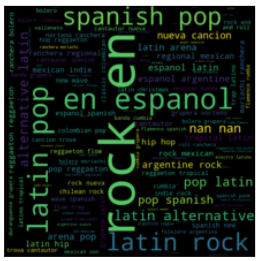

### Referencias
https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/#two

https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/

https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-learn-data-science-python-scratch-2/

Github:


http://nbviewer.jupyter.org/github/albahnsen/PracticalMachineLearningClass/blob/master/notebooks/06-data_preparation_evaluation_update.ipynb

Data:

https://www.kaggle.com/adityapatil673/visual-analysis-of-apps-on-applestore?utm_medium=email&utm_source=mailchimp&utm_campaign=datanotes-20180726

https://www.analyticsvidhya.com/blog/2018/05/24-ultimate-data-science-projects-to-boost-your-knowledge-and-skills/?utm_medium=social&utm_source=facebook.com&utm_campaign=buffer

Repositorio de librerías:

https://www.lfd.uci.edu/~gohlke/pythonlibs/